In [14]:
import numpy as np
import math
import os 
import csv 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [49]:
def distance(i,j):
    """Calculate the distance between two centers"""
    return math.sqrt(np.sum((np_geom[i]-np_geom[j])**2))
def angle(i,j,k):
    """Calcuate the angle in degrees between three atom centers!!!""" 
    eji=(np_geom[i]-np_geom[j])/ distance(i,j)
    ejk=(np_geom[k]-np_geom[j])/distance(j,k)
    return np.arccos(np.dot(eji,ejk))
def out_of_plane(i,j,k,l):
    """"Calculate the out of plane angle for three atom centers
        Input is the Cartesian geometry for the four atoms positions."""
    ekl=(l-k)/distance(l,k)
    ekj=(j-k)/distance(k,j)
    eki=(i-k)/distance(i,k)
    temp_ang = angle(j,k,l)
    if temp_ang > 1.0:
        temp_ang= 1.000
    elif temp_ang < -1.0:
        temp_ang = -1.000
    return(np.arcsin(np.dot(np.cross(ekj,ekl)/np.sin(temp_ang),eki)))


In [48]:
file1=open('benzene.dat','r')
# file1=open('acetaldehyde.dat','r')
line=file1.readline()
natoms = int(line)
atnums=[]
geom=[]

for line in file1:
    columns = line.split()
    atnums.append(columns[1])
    geom.append(columns[3:])
file1.close()

np_geom=np.array(geom).astype(float)
np_atnums=np.array(atnums).astype(int)
dist=np.zeros((natoms,natoms))

for i in range(natoms):
    for j in range (natoms):
        dist[i,j] = distance(i,j)
dist = dist *0.529
# print(dist)


Determine the angle out of plane.  


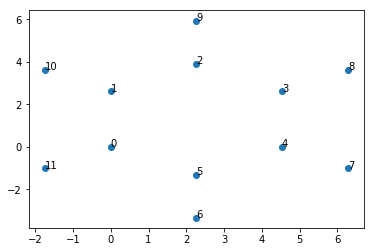

In [54]:
ang= np.zeros((natoms,natoms,natoms))
plt.scatter(np_geom[:,0],np_geom[:,2])
for i, txt in enumerate(np_atnums):
    plt.annotate(i, (np_geom[i,0],np_geom[i,2]))
plt.show()

for i in range(natoms):
    for j in range(natoms):
        for k in range(natoms):
            if(i < j and j != k and i!=k and dist[i,j] < 1.7 and dist[j,k] < 1.7):
                ang[i,j,k]= angle(i,j,k)          

The cell above is trying to calculate the 

In [62]:
def dihedral(i,j,k,l):
    """Calculate the dihedral angle for four atom centers
    Input is the Cartesian position of the four atom positions."""
    eij=(np_geom[j]-np_geom[i])/distance(i,j)
    ejk=(np_geom[k]-np_geom[j])/distance(j,k)
    ekl=(np_geom[l]-np_geom[k])/distance(l,k)
    temp_ang1=np.sin(angle(i,j,k))
    temp_ang2=np.sin(angle(j,k,l))
    if temp_ang1 > 1.0:
        temp_ang1= 1.000
    elif temp_ang1 < -1.0:
        temp_ang1 = -1.000
    if temp_ang2 > 1.0:
        temp_ang2= 1.000
    elif temp_ang2 < -1.0:
        temp_ang2 = -1.000
        print(i,j,k,l,eij,ejk,ekl,temp_ang1,temp_ang2)
    return(np.arccos(np.dot(np.cross(eij,ejk),np.cross(ejk,ekl))/(temp_ang1*temp_ang2)))
    
oop= np.zeros((natoms,natoms,natoms,natoms))
dih= np.zeros((natoms,natoms,natoms,natoms))

for i in range(natoms):
    for j in range(natoms):
        for k in range(natoms):
            for l in range(natoms):
                if (i != j and i != k and i != l and j != k and j != l and k != l):
                    if (dist[i,j], dist[j,k], dist[k,l] < 1.7):
#                         oop[i,j,k,l] = out_of_plane(np_geom[i],np_geom[j],np_geom[k],np_geom[l])
                        dih[i,j,k,l] = dihedral(i,j,k,l)
                        print(i,j,k,l,dih[i,j,k,l])
#                         print(i,j,k,l,dih[i,j,k,l]*180./math.pi)
#                         print(i,j,k,l,180.*oop[i,j,k,l]/math.pi)

0 1 2 3 2.580956827951785e-08
0 1 2 4 0.0
0 1 2 5 0.0
0 1 2 6 nan
0 1 2 7 1.4901161193847656e-08
0 1 2 8 nan
0 1 2 9 3.141592653589793
0 1 2 10 3.141592627780225
0 1 2 11 nan
0 1 3 2 3.1415926141650266
0 1 3 4 2.1073424255447017e-08
0 1 3 5 2.1073424255447017e-08
0 1 3 6 1.4901161193847656e-08
0 1 3 7 1.4901161193847656e-08
0 1 3 8 3.1415926170895516
0 1 3 9 3.141592638688632
0 1 3 10 3.1415925605320716
0 1 3 11 2.9802322387695312e-08
0 1 4 2 nan
0 1 4 3 3.141592653589793
0 1 4 5 nan
0 1 4 6 0.0
0 1 4 7 2.914549454900267
0 1 4 8 3.141592653589793
0 1 4 9 3.141592653589793
0 1 4 10 nan
0 1 4 11 0.0
0 1 5 2 3.1415926237874707
0 1 5 3 3.141592653589793
0 1 5 4 3.141592638688632
0 1 5 6 1.4901161193847656e-08
0 1 5 7 3.141592638688632
0 1 5 8 3.141592653589793
0 1 5 9 3.141592638688632
0 1 5 10 6.495265578539184e-08
0 1 5 11 1.4901161193847656e-08
0 1 6 2 nan
0 1 6 3 3.1415926325163688
0 1 6 4 3.1415926325163688
0 1 6 5 3.1415926325163688
0 1 6 7 3.141592638688632
0 1 6 8 3.141592632516368

/Users/layf0001/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in arccos
/Users/layf0001/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/Users/layf0001/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in arccos
  


 7 3 3.1415926325163688
0 4 7 5 3.332000937312528e-08
0 4 7 6 3.6500241499888574e-08
0 4 7 8 3.1415926202697837
0 4 7 9 3.1415925978347534
0 4 7 10 2.7794312782063377
0 4 7 11 4.942156062059701e-08
0 4 8 1 0.0
0 4 8 2 nan
0 4 8 3 nan
0 4 8 5 nan
0 4 8 6 8.940696716308596e-08
0 4 8 7 nan
0 4 8 9 nan
0 4 8 10 0.0
0 4 8 11 0.0
0 4 9 1 2.580956827951785e-08
0 4 9 2 2.580956827951785e-08
0 4 9 3 3.1415925998628924
0 4 9 5 2.580956827951785e-08
0 4 9 6 2.1073424255447017e-08
0 4 9 7 3.141592551432579
0 4 9 8 3.141592653589793
0 4 9 10 2.580956827951785e-08
0 4 9 11 0.0
0 4 10 1 2.810312607350734
0 4 10 2 3.1415926202697837
0 4 10 3 3.1415926041682325
0 4 10 5 1.4901161193847656e-08
0 4 10 6 2.580956827951785e-08
0 4 10 7 nan
0 4 10 8 3.1415926170895516
0 4 10 9 3.141592638688632
0 4 10 11 0.0
0 4 11 1 nan
0 4 11 2 nan
0 4 11 3 nan
0 4 11 5 nan
0 4 11 6 nan
0 4 11 7 nan
0 4 11 8 nan
0 4 11 9 nan
0 4 11 10 nan
0 5 1 2 3.141592653589793
0 5 1 3 3.1415926325163688
0 5 1 4 3.141592638688632
0 5 1